# USEFUL LINKS / VIDEO TUTORIALS

* [Principal Component Analysis (PSA), Step-by-Step](https://www.youtube.com/watch?v=FgakZw6K1QQ) // ENL video, available subtitles, nice plots// - simple explanation of the PCA method, clearly showed what is a Principal Component, how calculated informational impact of each Principal Component and how to use PCA for representation high dimensional data in 2D/3D plots.
* [Singular Value Decomposition (SVD)](https://www.youtube.com/watch?v=gXbThCXjZFM&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv) - Series of lessons. Math of Singular Value Decomposition behind the PCA method, here is a series of nice Lessons, recommended for deper understanding the PCA method. Showed SVD (base of PCA) method on the matrix math level.
* [Data Driven Science & Engineering](http://databookuw.com/) - The same lessons in web-book format.
* [PCA with Python Example with using libs](https://www.geeksforgeeks.org/principal-component-analysis-with-python/)


# Naive PCA

## import stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder

## Load and prepare data:

In [2]:
dataset = pd.read_csv("data/irises/IRIS.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x_data = dataset[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
x_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y_data = dataset["species"]
y_data.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

## Applying PCA:

In [8]:
def pca_own_realization(X, n_components):
    # 1. Standardize the data
    X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # 2. Compute the covariance matrix
    cov_mat = np.cov(X_std, rowvar=False)

    # 3. Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

    # 4. Sort the eigenvalues in decreasing order and choose the top k eigenvectors
    idx = np.argsort(eigenvalues)[::-1][:n_components]
    eigenvectors = eigenvectors[:, idx]

    # 5. Project the data onto the top k eigenvectors
    X_pca = np.dot(X_std, eigenvectors)

    # 7. Calculate explained_variance
    explained_variance = eigenvalues / np.sum(eigenvalues)

    return X_pca, explained_variance

In [9]:
x_trans_data, ev = pca_own_realization(x_data, n_components=2)
x_trans_data

array([[-2.26454173e+00, -5.05703903e-01],
       [-2.08642550e+00,  6.55404729e-01],
       [-2.36795045e+00,  3.18477311e-01],
       [-2.30419716e+00,  5.75367713e-01],
       [-2.38877749e+00, -6.74767397e-01],
       [-2.07053681e+00, -1.51854856e+00],
       [-2.44571134e+00, -7.45626750e-02],
       [-2.23384186e+00, -2.47613932e-01],
       [-2.34195768e+00,  1.09514636e+00],
       [-2.18867576e+00,  4.48629048e-01],
       [-2.16348656e+00, -1.07059558e+00],
       [-2.32737775e+00, -1.58587455e-01],
       [-2.22408272e+00,  7.09118158e-01],
       [-2.63971626e+00,  9.38281982e-01],
       [-2.19229151e+00, -1.88997851e+00],
       [-2.25146521e+00, -2.72237108e+00],
       [-2.20275048e+00, -1.51375028e+00],
       [-2.19017916e+00, -5.14304308e-01],
       [-1.89407429e+00, -1.43111071e+00],
       [-2.33994907e+00, -1.15803343e+00],
       [-1.91455639e+00, -4.30465163e-01],
       [-2.20464540e+00, -9.52457317e-01],
       [-2.77416979e+00, -4.89517027e-01],
       [-1.

In [14]:
print(f"Explained Variance ratio for all dims: {ev}")
print(f"Explained Variance ratio: {ev[:2]}")

Explained Variance ratio for all dims: [0.72770452 0.23030523 0.03683832 0.00515193]
Explained Variance ratio: [0.72770452 0.23030523]


## Draw PCA transformed data

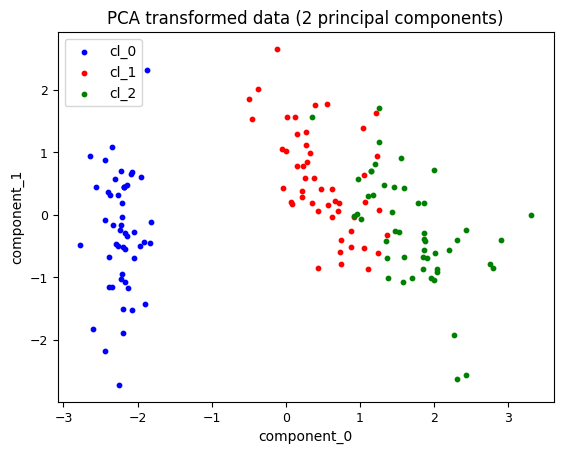

In [7]:
vec_colors = ['blue', 'red', 'green', 'orange', 'lime', 'purple',
              'aqua', 'navy', 'coral', 'teal', 'mustard', 'black',
              'maroon', 'yellow', 'pink']
count_clusters = 3
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(y_data)

plt.title('PCA transformed data (2 principal components)')

pten_cluster_entries_1 = []
for cl in range(count_clusters):
    pvec_cluster_entries_axis_0 = []
    pvec_cluster_entries_axis_1 = []
    for en in range(len(x_trans_data)):
        if cl == y_data[en]:
            pvec_cluster_entries_axis_0.append(x_trans_data[en][0])
            pvec_cluster_entries_axis_1.append(x_trans_data[en][1])
    pten_cluster_entries_1.append([pvec_cluster_entries_axis_0, pvec_cluster_entries_axis_1])

for cl_inx in range(count_clusters):
        plt.scatter(pten_cluster_entries_1[cl_inx][0], pten_cluster_entries_1[cl_inx][1], s=10, c=vec_colors[cl_inx],
                       marker='o', label='cl_' + str(cl_inx))
plt.legend(loc='upper left')
plt.xlabel("component_0")
plt.ylabel("component_1")
plt.tick_params(axis='both', which='major', labelsize=9)

plt.show()

# PCA with using "sklearn.decomposition"

## import required stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
dataset = pd.read_csv("data/irises/IRIS.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x_data = dataset[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
x_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y_data = dataset["species"]
y_data.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

## Doing preprocessing stuff with StandardScaler

In [5]:
sc = StandardScaler()
x_data = sc.fit_transform(x_data)

# warning DataFrame was converted to np.array
x_data

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

## Applying PCA
! IMPORTANT you can use your training data for fitting PCA transformator and them apply it for transformation your training and validation data

In [6]:
pca = PCA(n_components=2)
x_trans_data = pca.fit_transform(x_data)

print(f"Explained Variance ratio: {pca.explained_variance_ratio_}")
print(f"Explained Variance      : {pca.explained_variance_}")

Explained Variance ratio: [0.72770452 0.23030523]
Explained Variance      : [2.93035378 0.92740362]


# Drawing original:

In [7]:
x_names = dataset.columns.tolist()[:-1]
print(x_names)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [8]:
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(y_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
vec_colors = ['blue', 'red', 'green', 'orange', 'lime', 'purple',
              'aqua', 'navy', 'coral', 'teal', 'mustard', 'black',
              'maroon', 'yellow', 'pink']


def draw_clusters(c_clusters, pten_cluster_entries, x_label_name, y_label_name, obj_ax, plot_number):
    obj_ax.subplot(2, 3, plot_number)
    for cl_inx in range(c_clusters):
        obj_ax.scatter(pten_cluster_entries[cl_inx][0], pten_cluster_entries[cl_inx][1], s=10, c=vec_colors[cl_inx],
                       marker='o', label='cl_' + str(cl_inx))
    obj_ax.legend(loc='upper left')
    obj_ax.xlabel(x_label_name)
    obj_ax.ylabel(y_label_name)
    obj_ax.tick_params(axis='both', which='major', labelsize=9)

C:\Users\voldo\AppData\Local\Temp\ipykernel_17904\269949968.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  obj_ax.subplot(2, 3, plot_number)


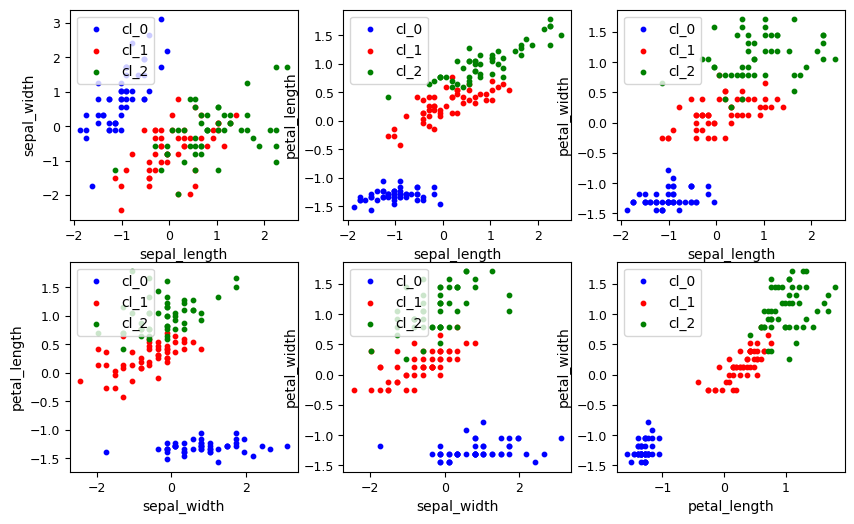

In [12]:
count_clusters = 3

mat_axis = [
    (0, 1),
    (0, 2),
    (0, 3),
    (1, 2),
    (1, 3),
    (2, 3)
]

plt.figure(figsize=(10, 6))
plt.title('Original Data printing different dims')

for i in range(len(mat_axis)):
    pten_cluster_entries_1 = []
    for cl in range(count_clusters):
        pvec_cluster_entries_axis_0 = []
        pvec_cluster_entries_axis_1 = []
        for en in range(len(x_data)):
            if cl == y_data[en]:
                pvec_cluster_entries_axis_0.append(x_data[en][mat_axis[i][0]])
                pvec_cluster_entries_axis_1.append(x_data[en][mat_axis[i][1]])
        pten_cluster_entries_1.append([pvec_cluster_entries_axis_0, pvec_cluster_entries_axis_1])

    draw_clusters(count_clusters, pten_cluster_entries_1,
                  x_names[mat_axis[i][0]], x_names[mat_axis[i][1]],
                  plt, i + 1)

plt.show()

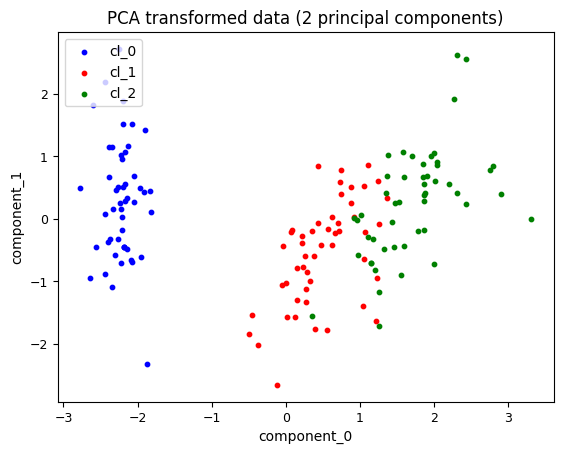

In [16]:
plt.title('PCA transformed data (2 principal components)')

pten_cluster_entries_1 = []
for cl in range(count_clusters):
    pvec_cluster_entries_axis_0 = []
    pvec_cluster_entries_axis_1 = []
    for en in range(len(x_trans_data)):
        if cl == y_data[en]:
            pvec_cluster_entries_axis_0.append(x_trans_data[en][0])
            pvec_cluster_entries_axis_1.append(x_trans_data[en][1])
    pten_cluster_entries_1.append([pvec_cluster_entries_axis_0, pvec_cluster_entries_axis_1])

for cl_inx in range(count_clusters):
        plt.scatter(pten_cluster_entries_1[cl_inx][0], pten_cluster_entries_1[cl_inx][1], s=10, c=vec_colors[cl_inx],
                       marker='o', label='cl_' + str(cl_inx))
plt.legend(loc='upper left')
plt.xlabel("component_0")
plt.ylabel("component_1")
plt.tick_params(axis='both', which='major', labelsize=9)

plt.show()